# ΕΡΓΑΣΙΑ

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


df = pd.read_csv("Coca-Cola_stock_history.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


# 

In [3]:
df.shape #βλέπουμε το μέγεθος του πίνακα

(15311, 8)

missing data

In [88]:
df.isnull()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
15306,False,False,False,False,False,False,False,False
15307,False,False,False,False,False,False,False,False
15308,False,False,False,False,False,False,False,False
15309,False,False,False,False,False,False,False,False


In [89]:
df.isnull().any()

Date            False
Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

In [90]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15306    False
15307    False
15308    False
15309    False
15310    False
Length: 15311, dtype: bool

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [10]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

Text(0.5, 1.0, 'ΔΙΑΓΡΑΜΜΑ ΠΟΣΟΤΗΤΩΝ')

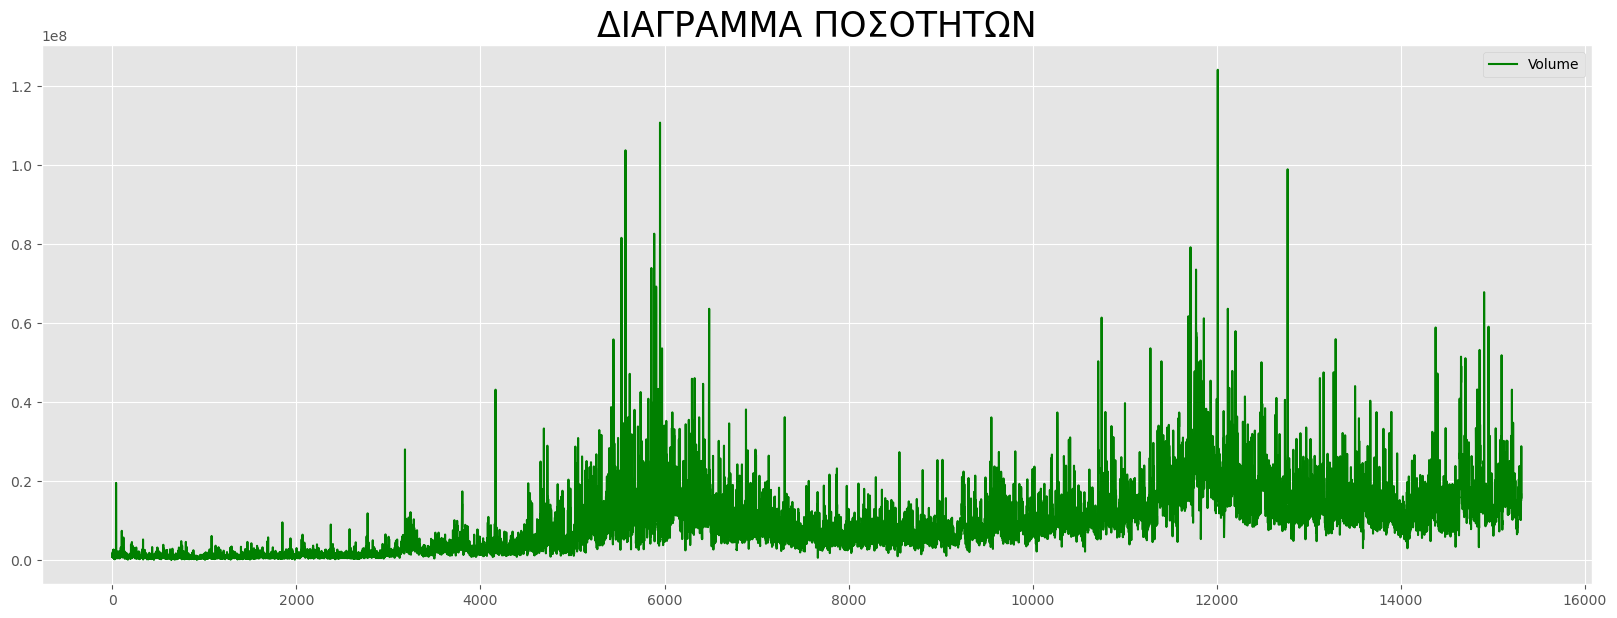

In [83]:
df[["Volume"]].plot(color='g',figsize=(20,7))
plt.title('ΔΙΑΓΡΑΜΜΑ ΠΟΣΟΤΗΤΩΝ',fontsize=25)

<AxesSubplot:ylabel='Density'>

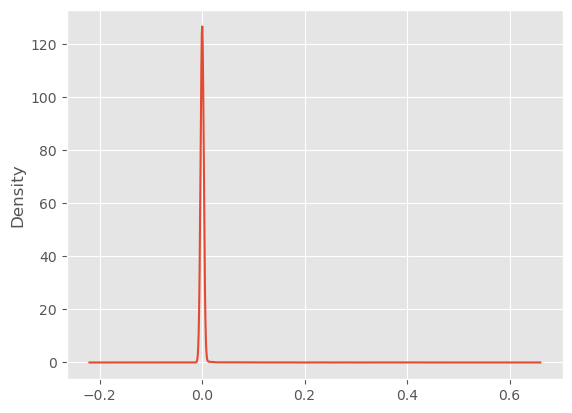

In [15]:
df["Dividends"].plot(kind='kde')

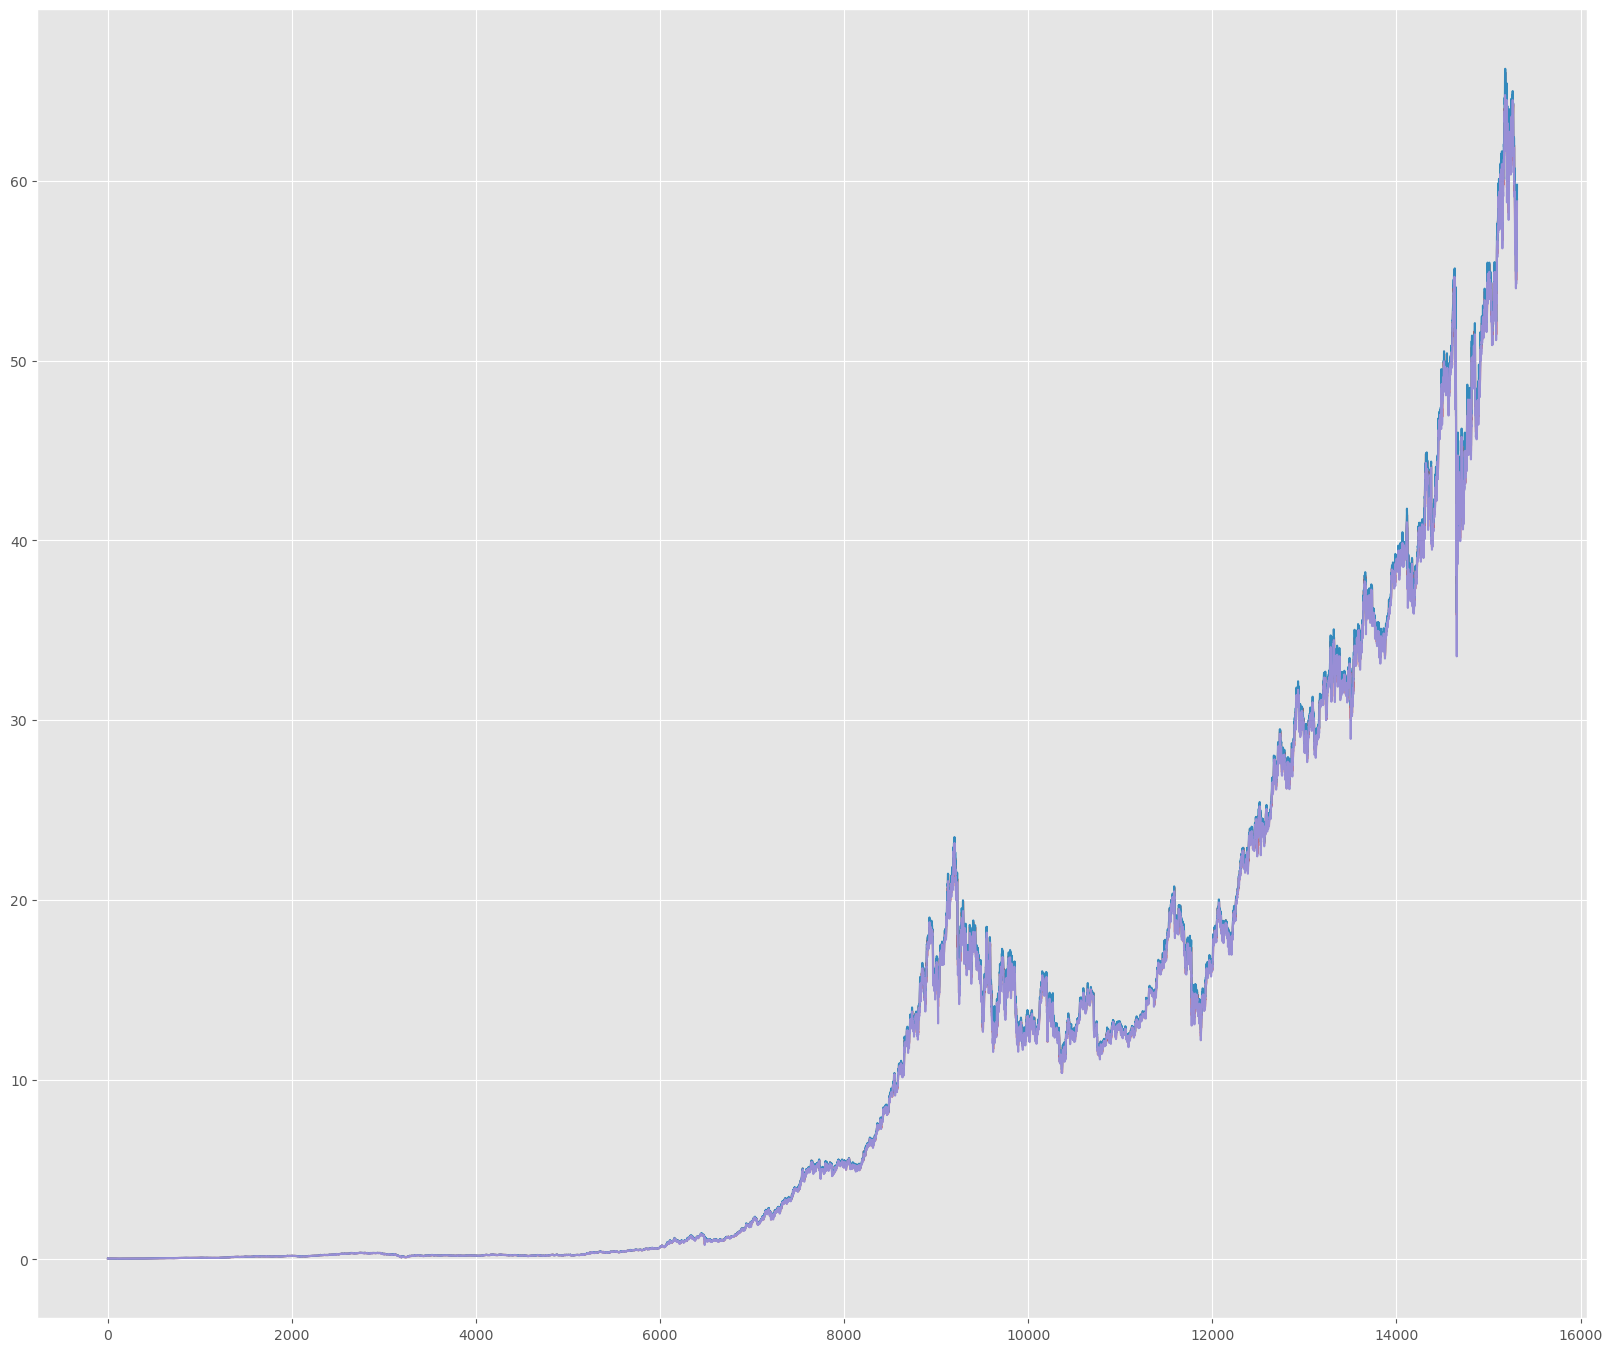

In [17]:
plt.figure(figsize=(20,17))
plt.plot(df['Open'])
plt.plot(df['High'])
plt.plot(df['Low'])

In [58]:
plt.figure(figsize=(10,10))
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

<Figure size 1000x1000 with 0 Axes>

Θα χωρίσουμε τον πίνακα σε 5 δεκαετίες 

In [59]:
df['Date'] =  pd.to_datetime(df['Date'],utc=True )


In [60]:
df.dtypes


Date            datetime64[ns, UTC]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume                        int64
Dividends                   float64
Stock Splits                  int64
name                         object
month                        object
year                          int64
dtype: object

In [61]:
df['name']= df['Date'].dt.day_name()

df.groupby('name')['Volume'].sum().sort_values(ascending = False)

name
Friday       29311516800
Tuesday      28831951800
Wednesday    28702319000
Thursday     28589766300
Monday       24494943500
Name: Volume, dtype: int64

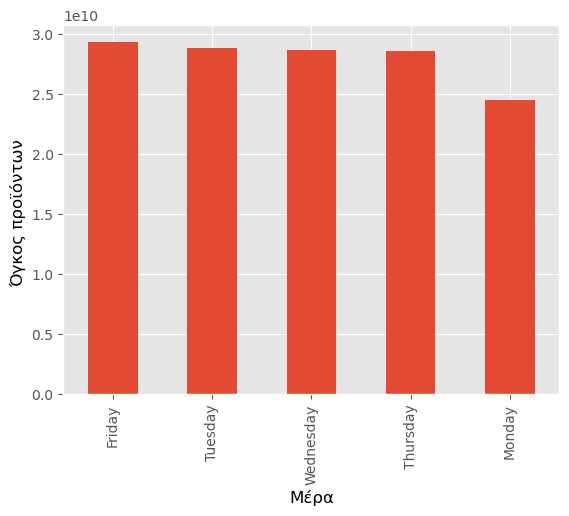

In [62]:
df['name']= df['Date'].dt.day_name()

df.groupby('name')['Volume'].sum().sort_values(ascending = False).plot.bar()
plt.ylabel('Όγκος προϊόντων ',color='k')
plt.xlabel('Mέρα',color='k')
plt.show()

μπορουμε να συμπεράνουμε ότι ο ποιό πολύς κόσμος αγοράζει το προιόν τις Παρασκευές 

In [63]:
df['month']= df['Date'].dt.month_name()
df.groupby('month')['Volume'].sum().sort_values(ascending = False)

month
March        13624203000
October      12809918700
September    12183160600
January      11885709700
May          11686422900
June         11613231200
April        11395454900
July         11239853900
February     11107532600
August       10985940100
December     10973136100
November     10425933700
Name: Volume, dtype: int64

Text(0.5, 0, 'Year')

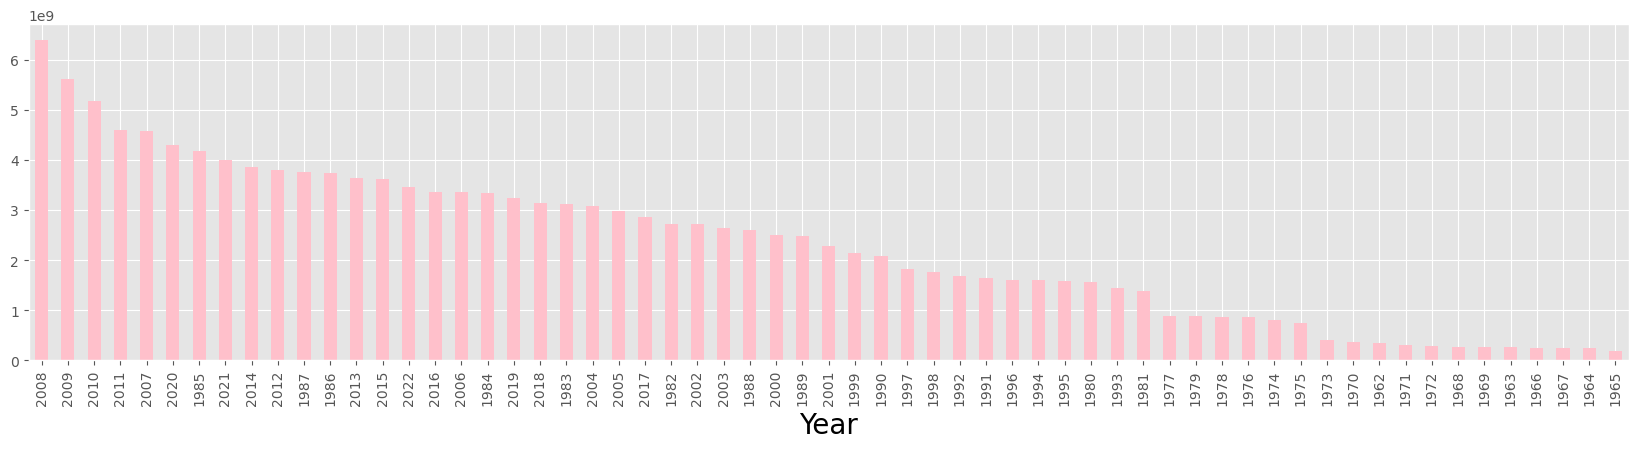

In [64]:
df['year']= df['Date'].dt.year
df.groupby('year')['Volume'].sum().sort_values(ascending = False ).plot(kind='bar',color='pink')
plt.subplots_adjust(left=0., bottom=0.2, right=2.5, top=0.9, wspace=0.4, hspace=0.4)
plt.xlabel('Year',color='k',fontsize=20)

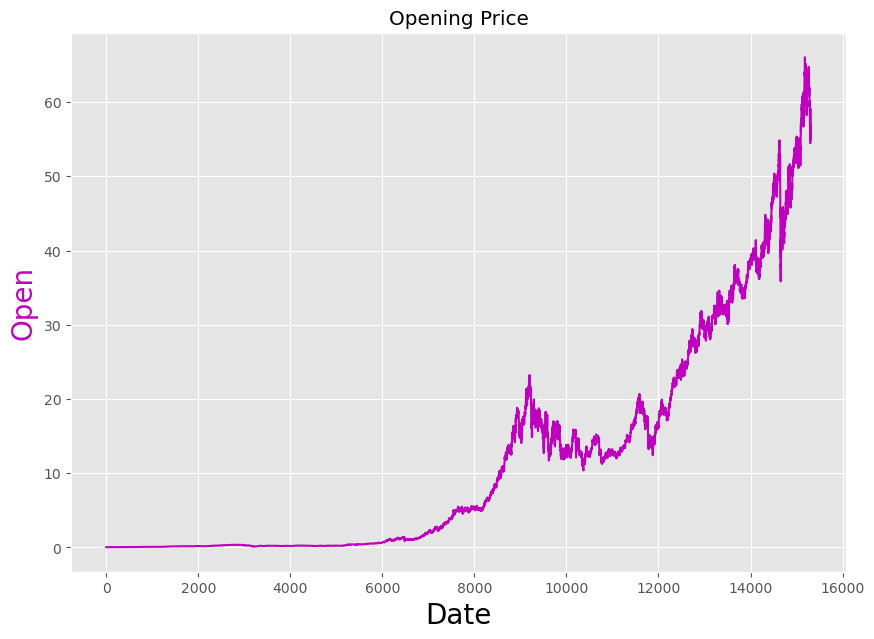

In [65]:
plt.style.use('ggplot')

plt.figure(figsize=(10,7))
plt.title('Opening Price')
plt.plot(df['Open'],color='m')
plt.xlabel('Date', fontsize=20,color='k')
plt.ylabel('Open', fontsize=20,color='m')
plt.show()

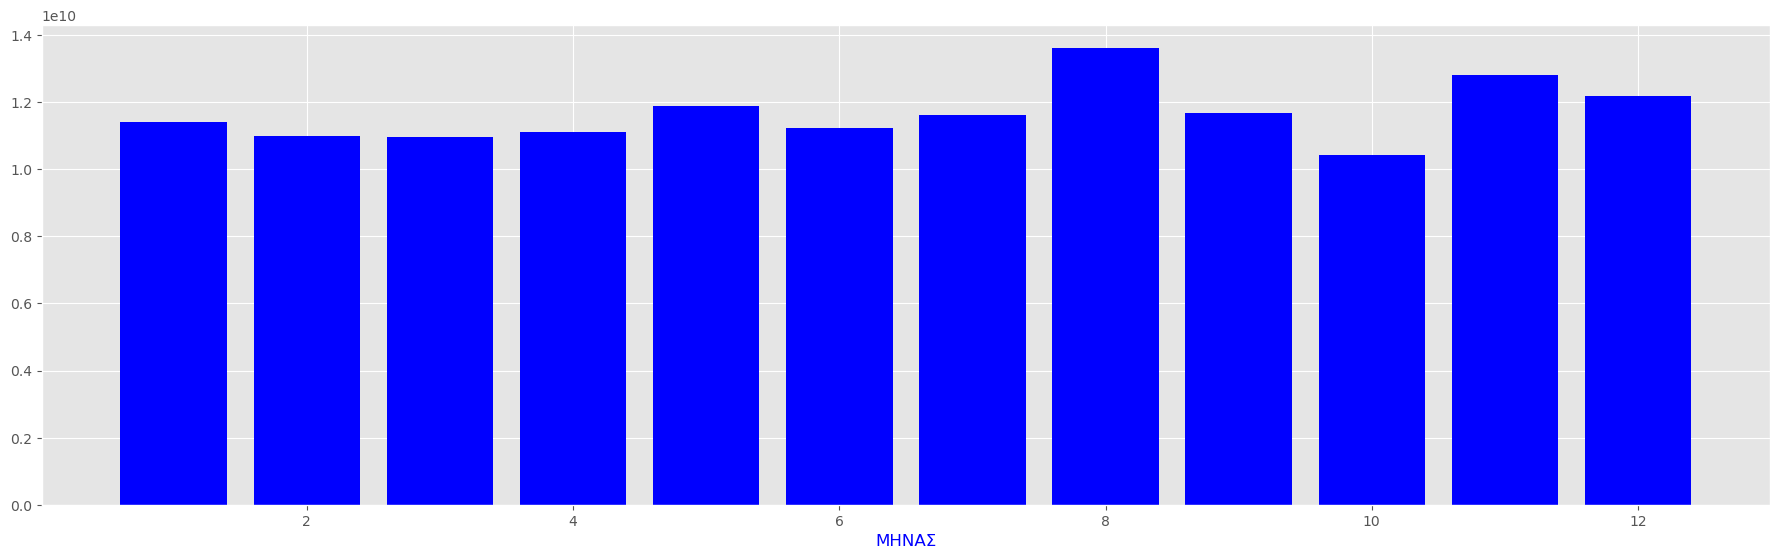

In [66]:
months=range(1,13)

monthsum=df.groupby('month')['Volume'].sum()

plt.bar(months,monthsum,color='blue',)
plt.xlabel('ΜΗΝΑΣ',color='b')
plt.subplots_adjust(left=0.1, bottom=0.3, right=2.8, top=1.3, wspace=0.4, hspace=0.3)


plt.show()

In [67]:
co = df.corr()
co

,Open,High,Low,Close,Volume,Dividends,Stock Splits,year
Open,1.000000,0.999957,0.999945,0.999910,0.456138,0.095580,-0.008980,0.868317
High,0.999957,1.000000,0.999927,0.999954,0.457375,0.095182,-0.009046,0.868461
Low,0.999945,0.999927,1.000000,0.999956,0.454299,0.095109,-0.009038,0.868185
Close,0.999910,0.999954,0.999956,1.000000,0.455750,0.094982,-0.009009,0.868360
Volume,0.456138,0.457375,0.454299,0.455750,1.000000,0.058258,-0.000433,0.625831
Dividends,0.095580,0.095182,0.095109,0.094982,0.058258,1.000000,-0.001780,0.086572
Stock Splits,-0.008980,-0.009046,-0.009038,-0.009009,-0.000433,-0.001780,1.000000,-0.007953
year,0.868317,0.868461,0.868185,0.868360,0.625831,0.086572,-0.007953,1.000000


<AxesSubplot:>

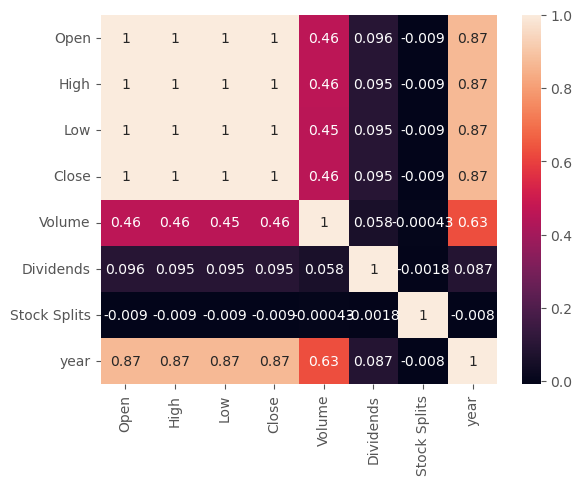

In [68]:
sns.heatmap(co,annot=True )

In [69]:
df['name']= df['Date'].dt.day_name()
df.groupby('name')['Volume'].max()

name
Friday       124169000
Monday       110784000
Thursday     103776000
Tuesday       63640000
Wednesday     69264000
Name: Volume, dtype: int64

In [70]:
df['month']= df['Date'].dt.month_name()
df.groupby('month')['Volume'].max().sort_values(ascending = False)

month
September    124169000
March        103776000
June          82656000
January       81609600
July          79214400
April         73968000
October       73567200
February      63648600
May           59109600
December      51874400
November      50104800
August        50096800
Name: Volume, dtype: int64

In [71]:
df['year']= df['Date'].dt.year
m = df.groupby('year')['Volume'].max()
m

year
1962    19545600
1963     5222400
1964     4800000
1965     4608000
1966     6105600
          ...   
2018    32477700
2019    58905400
2020    51513500
2021    67845700
2022    43159000
Name: Volume, Length: 61, dtype: int64

In [72]:
m.max()

124169000